In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def f(x):
    return 0.5*np.exp(-(x+3) ** 2) + np.exp(-x**2) + 0.5*np.exp(-(x-3) ** 2)

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


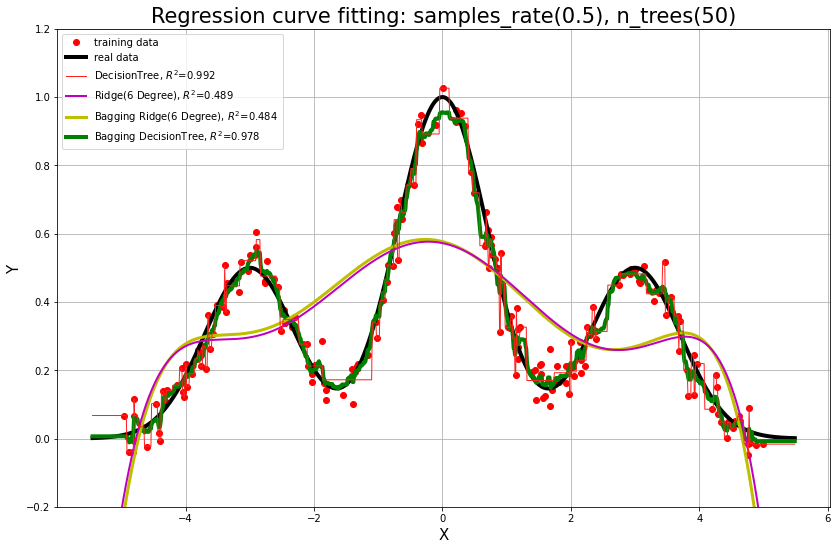

In [3]:
np.random.seed(0)
N = 200
x = np.random.rand(N) * 10 - 5  # [-5,5)
x = np.sort(x)
y = f(x) + 0.05*np.random.randn(N)
x.shape = -1, 1

degree = 6
n_estimators = 50
max_samples = 0.5

ridge = RidgeCV(alphas=np.logspace(-3, 2, 20), fit_intercept=False)
ridged = Pipeline([('poly', PolynomialFeatures(degree=degree)), ('Ridge', ridge)])
bagging_ridged = BaggingRegressor(ridged, n_estimators=n_estimators, max_samples=max_samples)
dtr = DecisionTreeRegressor(max_depth=9)


regs = [
    ('DecisionTree', dtr),
    ('Ridge(%d Degree)' % degree, ridged),
    ('Bagging Ridge(%d Degree)' % degree, bagging_ridged),
    ('Bagging DecisionTree', BaggingRegressor(dtr, n_estimators=n_estimators, max_samples=max_samples))]
x_test = np.linspace(1.1*x.min(), 1.1*x.max(), 1000)

plt.figure(figsize=(12, 8), facecolor='w')
plt.plot(x, y, 'ro', label='training data')
plt.plot(x_test, f(x_test), color='k', lw=4, ls='-', label='real data')
clrs = '#FF2020', 'm', 'y', 'g'
for i, (name, reg) in enumerate(regs):
    reg.fit(x, y)
    label = '%s, $R^2$=%.3f' % (name, reg.score(x, y))
    y_test = reg.predict(x_test.reshape(-1, 1))
    plt.plot(x_test, y_test, color=clrs[i], lw=i+1, label=label, zorder=6-i)
plt.legend(loc='upper left')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title('Regression curve fitting: samples_rate(%.1f), n_trees(%d)' % (max_samples, n_estimators), fontsize=21)
plt.ylim((-0.2, 1.2))
plt.tight_layout(2)
plt.grid(True)
plt.show()